In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
#country with renewable , non renewable,co2 emmission, particulate matter and respiratory death rate, different years data. 
cleanDF = pd.read_csv("../Downloads/cleaned_data.csv")
cleanDF

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,0,Argentina,2015,33567.573000,0.247105,104023.260000,0.752895,191743840.0,13.940,34.86
1,1,Argentina,2016,31013.883000,0.213672,108158.284000,0.786328,189920430.0,13.690,35.81
2,2,Argentina,2017,33292.217000,0.249992,104623.013000,0.750008,186898880.0,13.008,35.94
3,3,Argentina,2018,34652.219560,0.324108,104535.897342,0.675892,180599330.0,12.384,35.09
4,4,Argentina,2019,34524.081521,0.275338,97938.231521,0.724662,178511620.0,11.832,34.85
...,...,...,...,...,...,...,...,...,...,...
336,336,Switzerland,2015,42255.900000,0.552085,23861.750000,0.447915,38731820.0,10.782,15.62
337,337,Switzerland,2016,39423.574000,0.669028,22269.681000,0.330972,39185340.0,9.956,15.32
338,338,Switzerland,2017,40241.822000,0.642973,21408.501000,0.357027,38178644.0,9.854,15.15
339,339,Switzerland,2018,41232.025374,0.530301,26218.760654,0.469699,36873816.0,9.974,15.03


In [3]:
cleanDF

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,0,Argentina,2015,33567.573000,0.247105,104023.260000,0.752895,191743840.0,13.940,34.86
1,1,Argentina,2016,31013.883000,0.213672,108158.284000,0.786328,189920430.0,13.690,35.81
2,2,Argentina,2017,33292.217000,0.249992,104623.013000,0.750008,186898880.0,13.008,35.94
3,3,Argentina,2018,34652.219560,0.324108,104535.897342,0.675892,180599330.0,12.384,35.09
4,4,Argentina,2019,34524.081521,0.275338,97938.231521,0.724662,178511620.0,11.832,34.85
...,...,...,...,...,...,...,...,...,...,...
336,336,Switzerland,2015,42255.900000,0.552085,23861.750000,0.447915,38731820.0,10.782,15.62
337,337,Switzerland,2016,39423.574000,0.669028,22269.681000,0.330972,39185340.0,9.956,15.32
338,338,Switzerland,2017,40241.822000,0.642973,21408.501000,0.357027,38178644.0,9.854,15.15
339,339,Switzerland,2018,41232.025374,0.530301,26218.760654,0.469699,36873816.0,9.974,15.03


In [4]:
#sorting the values on the basis of particulate matter
cleanDF.sort_values(by = ["Particulate Matter"])

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
108,108,Finland,2017,30673.984000,0.466033,3.436920e+04,0.533967,4.457780e+07,5.770,14.82
107,107,Finland,2016,29614.757000,0.425184,3.658848e+04,0.574816,4.718186e+07,5.818,14.89
110,110,Finland,2019,30976.840200,0.483117,3.507564e+04,0.516883,4.238184e+07,5.834,14.60
157,157,Iceland,2016,18168.608000,0.999789,3.000000e+00,0.000211,3.485184e+06,5.938,17.69
98,98,Estonia,2017,1689.635000,0.176163,9.558855e+03,0.823837,1.876249e+07,5.944,10.65
...,...,...,...,...,...,...,...,...,...,...
165,165,India,2019,310518.426998,0.171392,1.223419e+06,0.828608,2.626459e+09,50.870,125.11
163,163,India,2017,244981.875789,0.153179,1.160883e+06,0.846821,2.434868e+09,52.000,126.84
162,162,India,2016,230497.902364,0.145783,1.120616e+06,0.854217,2.383816e+09,53.732,129.23
164,164,India,2018,274527.322742,0.156672,1.245011e+06,0.843328,2.600446e+09,56.232,127.80


In [5]:
#sorting values of renewable energy, non renewable, co2emissions , particulate matters and respiratory death rate 
cleanDF.sort_values("Particulate Matter").head(10)  
cleanDF

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,0,Argentina,2015,33567.573000,0.247105,104023.260000,0.752895,191743840.0,13.940,34.86
1,1,Argentina,2016,31013.883000,0.213672,108158.284000,0.786328,189920430.0,13.690,35.81
2,2,Argentina,2017,33292.217000,0.249992,104623.013000,0.750008,186898880.0,13.008,35.94
3,3,Argentina,2018,34652.219560,0.324108,104535.897342,0.675892,180599330.0,12.384,35.09
4,4,Argentina,2019,34524.081521,0.275338,97938.231521,0.724662,178511620.0,11.832,34.85
...,...,...,...,...,...,...,...,...,...,...
336,336,Switzerland,2015,42255.900000,0.552085,23861.750000,0.447915,38731820.0,10.782,15.62
337,337,Switzerland,2016,39423.574000,0.669028,22269.681000,0.330972,39185340.0,9.956,15.32
338,338,Switzerland,2017,40241.822000,0.642973,21408.501000,0.357027,38178644.0,9.854,15.15
339,339,Switzerland,2018,41232.025374,0.530301,26218.760654,0.469699,36873816.0,9.974,15.03


In [6]:
#air quality on the basic of country name, co2 emmission , particulate matter and respiratory disease
airDF = cleanDF.drop(columns = ["Renewables Share", "Non-Renewables Share", "Renewables Value","Non-Renewables Value","Unnamed: 0", "Year"])
airDF


,Country Name,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,Argentina,191743840.0,13.940,34.86
1,Argentina,189920430.0,13.690,35.81
2,Argentina,186898880.0,13.008,35.94
3,Argentina,180599330.0,12.384,35.09
4,Argentina,178511620.0,11.832,34.85
...,...,...,...,...
336,Switzerland,38731820.0,10.782,15.62
337,Switzerland,39185340.0,9.956,15.32
338,Switzerland,38178644.0,9.854,15.15
339,Switzerland,36873816.0,9.974,15.03


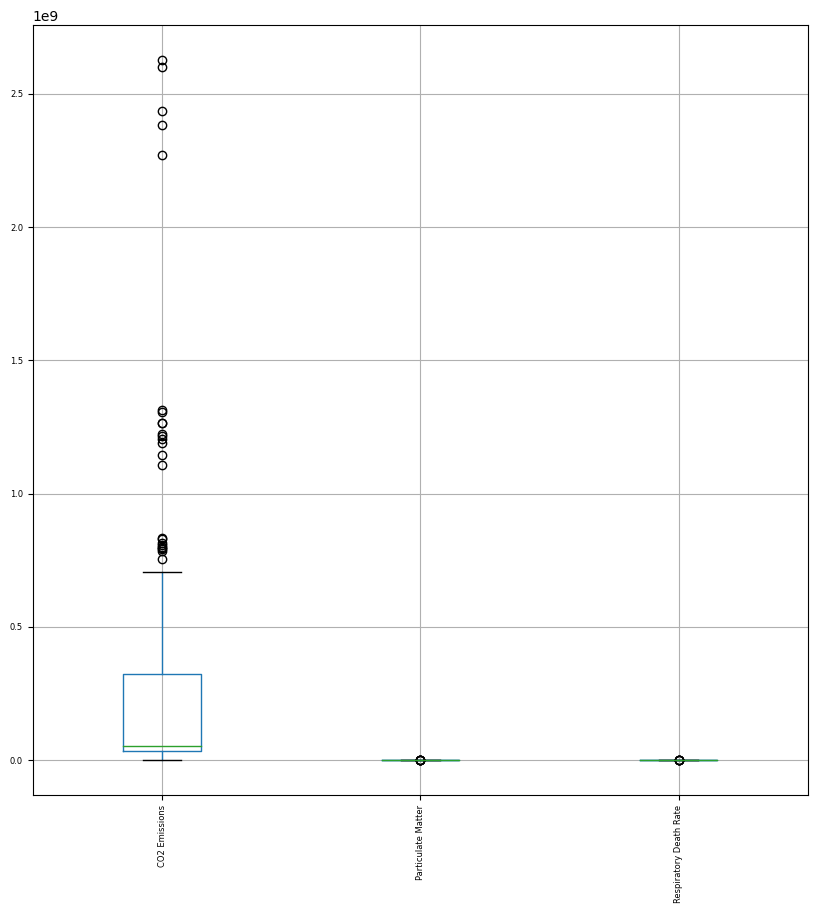

In [7]:
#genarating the box plot for co2 emmission, respiratory disease and the particulate matter
airplot = airDF.boxplot(figsize = (10,10), rot = 90, fontsize = "6", grid = True)


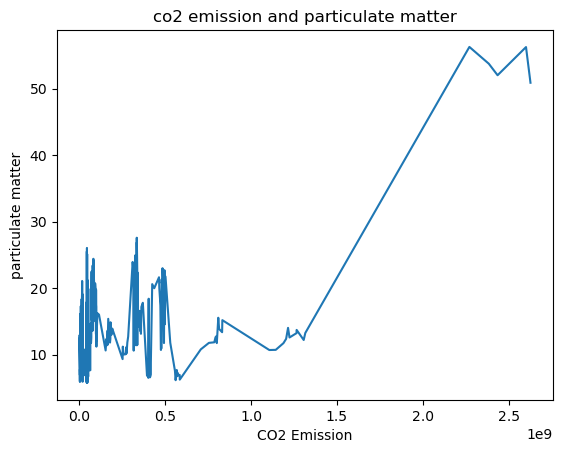

In [8]:
#generating the line plot for co2 emmission and particulate matter 
airDF=airDF.sort_values(by = ["CO2 Emissions"])
plt.title("co2 emission and particulate matter")
plt.xlabel("CO2 Emission")
plt.ylabel("particulate matter")
plt.plot(airDF["CO2 Emissions"],airDF["Particulate Matter"])
plt.show()

In [9]:
#generating the list of country , to see top five in list that have more co2 emission.
airDF["CO2 Emissions"]=airDF["CO2 Emissions"].sort_values()
airDF

,Country Name,CO2 Emissions,Particulate Matter,Respiratory Death Rate
227,Malta,1.356353e+06,12.410,15.84
228,Malta,1.530878e+06,11.796,15.70
229,Malta,1.546948e+06,12.898,15.54
230,Malta,1.649193e+06,12.094,15.40
226,Malta,1.665291e+06,12.958,15.98
...,...,...,...,...
161,India,2.270766e+09,56.254,134.68
162,India,2.383816e+09,53.732,129.23
163,India,2.434868e+09,52.000,126.84
164,India,2.600446e+09,56.232,127.80


In [10]:
airDF.sort_values(by = ["CO2 Emissions"])


,Country Name,CO2 Emissions,Particulate Matter,Respiratory Death Rate
227,Malta,1.356353e+06,12.410,15.84
228,Malta,1.530878e+06,11.796,15.70
229,Malta,1.546948e+06,12.898,15.54
230,Malta,1.649193e+06,12.094,15.40
226,Malta,1.665291e+06,12.958,15.98
...,...,...,...,...
161,India,2.270766e+09,56.254,134.68
162,India,2.383816e+09,53.732,129.23
163,India,2.434868e+09,52.000,126.84
164,India,2.600446e+09,56.232,127.80


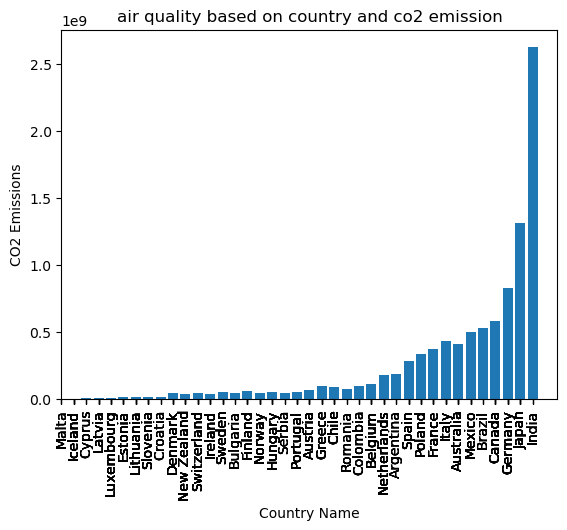

In [11]:
 #Bar Plot showing air quality with CO2 Emissions and country
x_values = airDF['Country Name']
y_values = airDF['CO2 Emissions']
plt.bar(x=x_values, height=y_values)
plt.title('air quality based on country and co2 emission')
plt.xlim(5, 40)
plt.xticks(x_values, rotation=90)
plt.xlabel('Country Name')
plt.ylabel('CO2 Emissions')
plt.show ()

The r-value is 0.5297677540693639


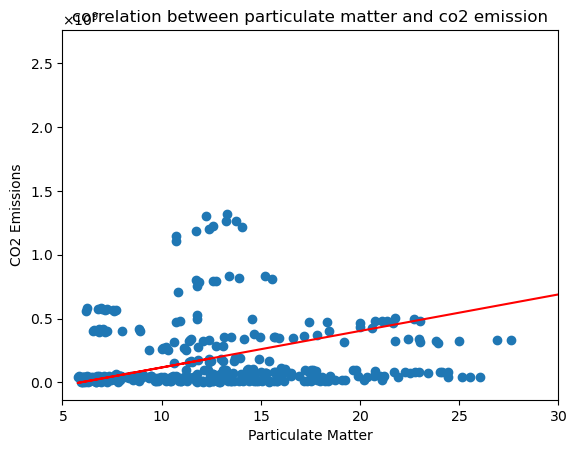

In [12]:
#Scatter Plot showing air quality with CO2 Emissions and country
x_values = airDF['Particulate Matter']
y_values = airDF['CO2 Emissions']
plt.scatter(x=x_values, y=y_values)
plt.title('correlation between particulate matter and co2 emission')
plt.xlabel('Particulate Matter')
plt.ylabel('CO2 Emissions')
plt.xlim(5, 30)
#Adding Regression Values
(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)
regressValues = x_values * slope + intercept
plt.plot(x_values, regressValues, 'r-')
plt.ticklabel_format(useOffset=False,useMathText=True)
print(f'The r-value is {rvalue}')
plt.show ()



In [13]:
#creating the hypothesis
#1.null hypothesis = there is no stastical significance exist between co2 emission and particulate matter.
#2.alternative hypothesis = there is significant relationship exist between co2 emission and particulate matter .

In [13]:
#T-value and p value
stats.ttest_ind(x_values, y_values, equal_var=False)

Ttest_indResult(statistic=-10.620800389487751, pvalue=6.039862888876152e-23)

In [14]:
#T-value and p value generated from particulate matter and co2 emission
sample_a=airDF['Particulate Matter']
sample_b=airDF['CO2 Emissions']
t_stat, p_value = stats.ttest_ind(sample_a, sample_b)
print ("t-statistic:",t_stat)
print ("p-value:",p_value)

t-statistic: -10.620800389487751
p-value: 1.747127032657012e-24


In [15]:
sample_c=airDF['Particulate Matter']
sample_d =airDF['CO2 Emissions']
R = np.corrcoef(sample_c, sample_d)[0,1]

In [16]:
#Correlation between particulate matter and co2 emissions
R


0.529767754069364